In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./iclr2019_papers_preprocessed.csv')

In [2]:
#EastAsian
mask = df['race'].isin(['EastAsian','Japanese'])
EAPaper = df[mask]
nEAPaper = df[~mask]
maskEA = EAPaper['decision'].isin(['Accept'])
masknEA = nEAPaper['decision'].isin(['Accept'])
EAAccept = EAPaper[maskEA]
EAReject = EAPaper[~maskEA]
nEAAccept = nEAPaper[masknEA]
nEAReject = nEAPaper[~masknEA]
#Europe (geographical)
mask = df['race'].isin(['French', 'British','EastEuropean',
                        'Germanic','Italian','Nordic'])
EuPaper = df[mask]
nEuPaper = df[~mask]
EuAccept = EuPaper.loc[EuPaper['decision'] == 'Accept']
#EuReject = EuPaper.loc[EuPaper['decision'] == 'Reject']
nEuAccept = nEuPaper.loc[nEuPaper['decision'] == 'Accept']
#nEuReject = nEuPaper.loc[nEuPaper['decision'] == 'Reject']
#IndianSubContinent
IndianPaper = df.loc[df['race'] == 'IndianSubContinent']
nIndianPaper = df.loc[df['race'] != 'IndianSubContinent']
IndianAccept = IndianPaper.loc[IndianPaper['decision'] == 'Accept']
nIndianAccept = nIndianPaper.loc[nIndianPaper['decision'] == 'Accept']
#Africans
AfricanPaper = df.loc[df['race'] == 'Africans']
nAfricanPaper = df.loc[df['race'] != 'Africans']
AfricanAccept = AfricanPaper.loc[AfricanPaper['decision'] == 'Accept']
nAfricanAccept = nAfricanPaper.loc[nAfricanPaper['decision'] == 'Accept']
#Hispanic
HispanicPaper = df.loc[df['race'] == 'Hispanic']
nHispanicPaper = df.loc[df['race'] != 'Hispanic']
HispanicAccept = HispanicPaper.loc[HispanicPaper['decision'] == 'Accept']
nHispanicAccept = nHispanicPaper.loc[nHispanicPaper['decision'] == 'Accept']
#Jewish
JewishPaper = df.loc[df['race'] == 'Jewish']
nJewishPaper = df.loc[df['race'] != 'Jewish']
JewAccept = JewishPaper.loc[JewishPaper['decision'] == 'Accept']
nJewAccept = nJewishPaper.loc[nJewishPaper['decision'] == 'Accept']
#Muslim
MusPaper = df.loc[df['race'] == 'Muslim']
nMusPaper = df.loc[df['race'] != 'Muslim']
MusAccept = MusPaper.loc[MusPaper['decision'] == 'Accept']
MusReject = MusPaper.loc[MusPaper['decision'] != 'Accept']
nMusAccept = nMusPaper.loc[nMusPaper['decision'] == 'Accept']
#Accept
acceptPaper = df.loc[df['decision'] == 'Accept']

In [3]:
numAll = len(df)
numPos = len(acceptPaper)
Wea = (len(EAPaper) * numPos) / (numAll * len(EAAccept))
Weu = (len(EuPaper) * numPos) / (numAll * len(EuAccept))
Win = (len(IndianPaper) * numPos) / (numAll * len(IndianAccept))
Waf = (len(AfricanPaper) * numPos) / (numAll * len(AfricanAccept))
Whi = (len(HispanicPaper) * numPos) / (numAll * len(HispanicAccept))
Wjw = (len(JewishPaper) * numPos) / (numAll * len(JewAccept))
Wmu = (len(MusPaper) * numPos) / (numAll * len(MusAccept))
weightList = []

print("Weightings: ", Wea,Weu,Win,Waf,Whi,Wjw,Wmu)

Weightings:  1.0461999922091076 0.910118464100535 0.9224476892375175 1.3266384778012685 1.1149123368996519 1.002349072116514 1.2617805966643176


In [4]:
#Add weights to the data
def weights_col(race):
    switcher={
        'EastAsian': Wea,
        'Japanese': Wea,
        'French': Weu,
        'British': Weu,
        'EastEuropean': Weu,
        'Germanic': Weu,
        'Italian': Weu,
        'Nordic': Weu,
        'IndianSubContinent': Win,
        'Africans': Waf,
        'Hispanic':Whi,
        'Jewish':Wjw,
        'Muslim': Wmu
    }
    return switcher.get(race,0)

In [5]:
for i in range(len(df)):
    weightList.append(weights_col(df['race'][i]))

In [6]:
df['weights'] = weightList

In [7]:
weightedTotal = len(EAPaper)*Wea + len(EuPaper)*Weu + len(IndianPaper)*Win + len(AfricanPaper)*Waf+len(HispanicPaper)*Whi+len(JewishPaper)*Wjw+len(MusPaper)*Wmu
weightedAccept = len(EAAccept)*Wea + len(EuAccept)*Weu + len(IndianAccept)*Win + len(AfricanAccept)*Waf+len(HispanicAccept)*Whi+len(JewAccept)*Wjw+len(MusAccept)*Wmu


In [8]:
def cal_Di(paperAcc,paper,W):
        dm = len(paperAcc) / len(paper)
        dn = (weightedAccept - len(paperAcc) * W) / (weightedTotal - len(paper)*W)
        return dm/dn

In [9]:
#EastAsian
mask = df['race'].isin(['EastAsian','Japanese'])
EAPaper = df[mask]
nEAPaper = df[~mask]
maskEA = EAPaper['decision'].isin(['Accept'])
masknEA = nEAPaper['decision'].isin(['Accept'])
EAAccept = EAPaper[maskEA]
EAReject = EAPaper[~maskEA]
#Europe (geographical)
mask = df['race'].isin(['French', 'British','EastEuropean',
                        'Germanic','Italian','Nordic'])
EuPaper = df[mask]
nEuPaper = df[~mask]
#IndianSubContinent
IndianPaper = df.loc[df['race'] == 'IndianSubContinent']
IndianAccept = IndianPaper.loc[IndianPaper['decision'] == 'Accept']

#Africans
AfricanPaper = df.loc[df['race'] == 'Africans']
AfricanAccept = AfricanPaper.loc[AfricanPaper['decision'] == 'Accept']
#Hispanic
HispanicPaper = df.loc[df['race'] == 'Hispanic']
HispanicAccept = HispanicPaper.loc[HispanicPaper['decision'] == 'Accept']
#Jewish
JewishPaper = df.loc[df['race'] == 'Jewish']
JewAccept = JewishPaper.loc[JewishPaper['decision'] == 'Accept']
#Muslim
MusPaper = df.loc[df['race'] == 'Muslim']
MusAccept = MusPaper.loc[MusPaper['decision'] == 'Accept']
MusReject = MusPaper.loc[MusPaper['decision'] != 'Accept']

In [10]:
#cal_Di(paperAcc,paper,W)
ea_Di = cal_Di(EAAccept,EAPaper,Wea)
eu_Di = cal_Di(EuAccept,EuPaper,Weu)
in_Di = cal_Di(IndianAccept,IndianPaper,Win)
af_Di = cal_Di(AfricanAccept,AfricanPaper,Waf)
hi_Di = cal_Di(HispanicAccept,HispanicPaper,Whi)
jw_Di = cal_Di(JewAccept,JewishPaper,Wjw)
mu_Di = cal_Di(MusAccept,MusPaper,Wmu)


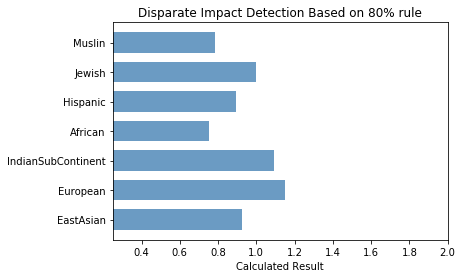

In [11]:
x = [ea_Di,eu_Di,in_Di,af_Di,hi_Di,jw_Di,mu_Di]
mylabels='EastAsian','European','IndianSubContinent','African','Hispanic','Jewish','Muslin'
plt.barh(range(7),x,height=0.7,color='steelblue',alpha=0.8)
plt.yticks(range(7),mylabels)
plt.xlim(0.25,2)
plt.xlabel('Calculated Result')
plt.title("Disparate Impact Detection Based on 80% rule")
plt.show()